Question 2

In [10]:
#(a)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
print(data.DESCR)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    test_size=0.3, 
                                                    random_state=50)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The value of d is 8 in this dataset

In [11]:
#(b)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=50)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 0.03561237258828922
Test MSE: 0.2643704261029829


I hope this won't cause you any inconvenience. Looking forward to your response.The value of m is 8, because we use default hyperparameters, so the 
max_features is 8.

In [12]:
#(c)
trees_mse = []
for tree in rf.estimators_:
    y_pred = tree.predict(X_test)
    trees_mse.append(mean_squared_error(y_test, y_pred))

print("MSE for Each Tree in the Test Set: ", trees_mse)
print("MSE for the Entire Forest on the Test Set: ", test_mse)

MSE for Each Tree in the Test Set:  [0.5492299401658591, 0.5302397605532784, 0.6049794481668281, 0.602028885702487, 0.5947437957668927, 0.6430340320716892, 0.5653728307504038, 0.6013802910773901, 0.5450129434605135, 0.5501374440352228, 0.5672762009702519, 0.5622726671523094, 0.5258212810607558, 0.5702052210381137, 0.5208931283826711, 0.625478728014664, 0.5581362527012274, 0.5805645501952842, 0.594155706095898, 0.5871157760478197, 0.6043121053505168, 0.5761633583569928, 0.607930533690003, 0.6093420094099483, 0.5430173128630813, 0.5709032669198805, 0.5813048339838987, 0.5401538015579296, 0.5882778607182977, 0.6104711977498384, 0.539875976260788, 0.5816350887257105, 0.5848523531307331, 0.5571811815448159, 0.5573483312449774, 0.557944039910998, 0.5419462107537951, 0.5462771541001453, 0.570012139390859, 0.5548241841713663, 0.526002003130943, 0.5752917458474484, 0.5670126634930394, 0.5813917092937984, 0.5760583168619186, 0.5499357693941375, 0.5736766030568636, 0.5451472552500322, 0.578099229

In [13]:
#(d)
import numpy as np
from scipy.stats import pearsonr

predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict(X_test))

correlations = []
for i in range(len(predictions)):
    for j in range(i+1, len(predictions)):
        corr, _ = pearsonr(predictions[i], predictions[j])
        correlations.append(corr)

mean_corr = np.mean(correlations)
print("the average of all pairwise correlations: ", mean_corr)

the average of all pairwise correlations:  0.7659047740859255


m	Train MSE	Test MSE	Avg Correlations
1	0.0393		0.2912		0.6073
2	0.0343		0.2539		0.7084
3	0.0341		0.2503		0.7359
4	0.0342		0.2548		0.7495
5	0.0350		0.2583		0.7523
6	0.0351		0.2591		0.7580
7	0.0353		0.2622		0.7616
8	0.0356		0.2644		0.7659


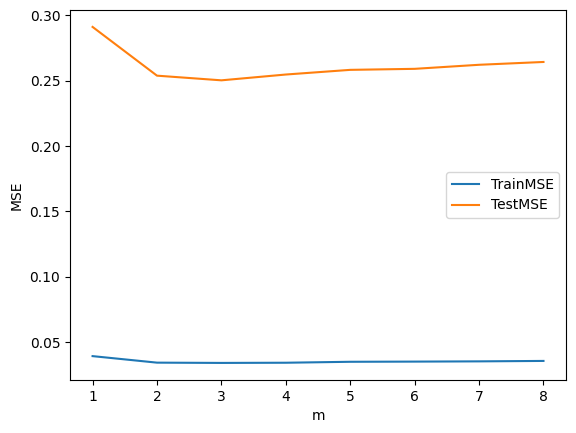

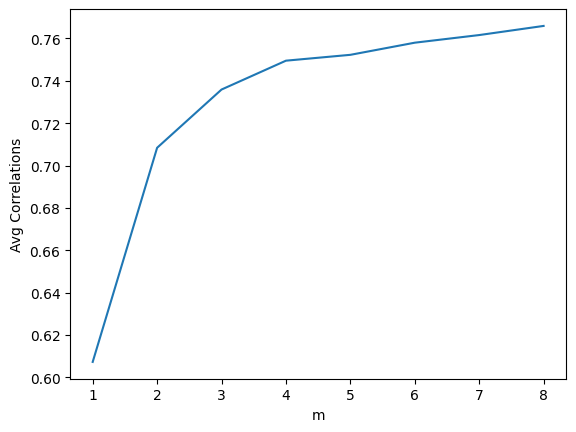

In [14]:
#(e)
import matplotlib.pyplot as plt
d = 8
mses_train = []
mses_test = []
mean_corrs = []

for m in range(1, d+1):
    rf = RandomForestRegressor(n_estimators=100, max_features=m, 
                               random_state=50)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mses_train.append(mse_train)
    mses_test.append(mse_test)
    predictions = []
    for tree in rf.estimators_:
        predictions.append(tree.predict(X_test))
    correlations = []
    for i in range(len(predictions)):
        for j in range(i+1, len(predictions)):
            corr, _ = pearsonr(predictions[i], predictions[j])
            correlations.append(corr)
    mean_corr = np.mean(correlations)
    mean_corrs.append(mean_corr)
    
print("m\tTrain MSE\tTest MSE\tAvg Correlations")
for m, mse_train, mse_test, avg_corr in zip(range(1, d+1), mses_train, 
                                            mses_test, mean_corrs):
    print(f"{m}\t{mse_train:.4f}\t\t{mse_test:.4f}\t\t{avg_corr:.4f}")


plt.figure()
plt.plot(range(1, d+1), mses_train, label='TrainMSE')
plt.plot(range(1, d+1), mses_test, label='TestMSE')
plt.xlabel('m')
plt.ylabel('MSE')
plt.legend()
plt.show()


plt.figure()
plt.plot(range(1, d+1), mean_corrs)
plt.xlabel('m')
plt.ylabel('Avg Correlations')
plt.show()

(f)
The average correlation increases as m increases, this is because in a random
 forest, the m determines number of features in each splitting node. When m 
 increases the correlation becomes bigger, it means their predictions increases.

(g)
False, When we choose m, we need to consider the m that corresponds to the 
smallest MSE value, rather than choosing the smallest m value directly.
Only choosing the m value with the smallest MSE will indicate the best fit.

Question4

(b)

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn import linear_model

import torch
import torch.optim as optim

class LogisticRegression:
    def __init__(self):
        pass

    def fit(self, X, y, lr=0.1, momentum=0, niter=100):
        '''
        Train a multiclass logistic regression model on the given training set.

        Parameters
        ----------
        X: training examples, represented as an input array of shape (n_sample,
           n_features).
        y: labels of training examples, represented as an array of shape
           (n_sample,) containing the classes for the input examples
        lr: learning rate for gradient descent
        niter: number of gradient descent updates
        momentum: the momentum constant (see assignment task sheet for an explanation)

        Returns
        -------
        self: fitted model
        '''
        self.classes_ = np.unique(y)
        self.class2int = dict((c, i) for i, c in enumerate(self.classes_))
        y = np.array([self.class2int[c] for c in y])

        n_features = X.shape[1]
        n_classes = len(self.classes_)

        self.intercept_ = np.zeros(n_classes)
        self.coef_ = np.zeros((n_classes, n_features))

        # Implement your gradient descent training code here; uncomment the code below to do "random training"
        #self.intercept_ = np.random.randn(*self.intercept_.shape)
        #self.coef_ = np.random.randn(*self.coef_.shape)
        return self

    def predict_proba(self, X):
        '''
        Predict the class distributions for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class distributions, represented as an array of shape (n_sample,
           n_classes)
        '''

        # Modify the code below to implement the idea for avoiding numerical flow as described in Q4 (b)
        scores = X @ self.coef_.T + self.intercept_
        scores -= np.max(scores, axis=1).reshape(-1, 1)
        scores = np.exp(scores)
        return scores / scores.sum(axis=1).reshape(-1, 1)

    def predict(self, X):
        '''
        Predict the classes for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class labels, represented as an array of shape (n_sample,)
        '''

        # replace pass with your code
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]


if __name__ == '__main__':
    X, y = fetch_covtype(return_X_y=True)
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = LogisticRegression()
    clf.fit(X_tr, y_tr)
    print(accuracy_score(y_tr, clf.predict(X_tr)))
    print(accuracy_score(y_ts, clf.predict(X_ts)))

0.36459572961436704
0.36462731778960894


(c)

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn import linear_model

import torch
import torch.optim as optim

class LogisticRegression:
    def __init__(self):
        pass

    def fit(self, X, y, lr=0.1, momentum=0, niter=100):
        '''
        Train a multiclass logistic regression model on the given training set.

        Parameters
        ----------
        X: training examples, represented as an input array of shape (n_sample,
           n_features).
        y: labels of training examples, represented as an array of shape
           (n_sample,) containing the classes for the input examples
        lr: learning rate for gradient descent
        niter: number of gradient descent updates
        momentum: the momentum constant (see assignment task sheet for an explanation)

        Returns
        -------
        self: fitted model
        '''
        self.classes_ = np.unique(y)
        self.class2int = dict((c, i) for i, c in enumerate(self.classes_))
        y = np.array([self.class2int[c] for c in y])

        n_features = X.shape[1]
        n_classes = len(self.classes_)

        self.intercept_ = np.zeros(n_classes)
        self.coef_ = np.zeros((n_classes, n_features))
        
        # Implement your gradient descent training code here; uncomment the code below to do "random training"
        # self.intercept_ = np.random.randn(*self.intercept_.shape)
        # self.coef_ = np.random.randn(*self.coef_.shape)
        for iteration in range(niter):
            softmax = self.predict_proba(X)

            # Compute the gradient of the log-loss
            error = softmax - np.eye(n_classes)[y]
            grad_coef = error.T @ X
            grad_intercept = np.sum(error, axis=0)
            # Update model parameters using gradient descent
            self.coef_ -= lr * grad_coef
            self.intercept_ -= lr * grad_intercept
        return self

    def predict_proba(self, X):
        '''
        Predict the class distributions for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class distributions, represented as an array of shape (n_sample,
           n_classes)
        '''

        # Modify the code below to implement the idea for avoiding numerical flow as described in Q4 (b)
        scores = X @ self.coef_.T + self.intercept_
        scores -= np.max(scores, axis=1).reshape(-1, 1)
        scores = np.exp(scores)
        return scores / scores.sum(axis=1).reshape(-1, 1)

    def predict(self, X):
        '''
        Predict the classes for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class labels, represented as an array of shape (n_sample,)
        '''
        # replace pass with your code
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]


if __name__ == '__main__':
    X, y = fetch_covtype(return_X_y=True)
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = LogisticRegression()
    clf.fit(X_tr, y_tr)
    print(accuracy_score(y_tr, clf.predict(X_tr)))
    print(accuracy_score(y_ts, clf.predict(X_ts)))

0.479938924240487
0.4800463557921792


(d)

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn import linear_model

import torch
import torch.optim as optim

class LogisticRegression:
    def __init__(self):
        pass

    def fit(self, X, y, lr=0.1, momentum=0, niter=100):
        '''
        Train a multiclass logistic regression model on the given training set.

        Parameters
        ----------
        X: training examples, represented as an input array of shape (n_sample,
           n_features).
        y: labels of training examples, represented as an array of shape
           (n_sample,) containing the classes for the input examples
        lr: learning rate for gradient descent
        niter: number of gradient descent updates
        momentum: the momentum constant (see assignment task sheet for an explanation)

        Returns
        -------
        self: fitted model
        '''
        np.random.seed(50)
        self.classes_ = np.unique(y)
        self.class2int = dict((c, i) for i, c in enumerate(self.classes_))
        y = np.array([self.class2int[c] for c in y])

        n_features = X.shape[1]
        n_classes = len(self.classes_)

        self.intercept_ = np.zeros(n_classes)
        self.coef_ = np.zeros((n_classes, n_features))
        
        log_losses = []
        # Implement your gradient descent training code here; uncomment the code below to do "random training"
        self.intercept_ = np.random.randn(*self.intercept_.shape)
        self.coef_ = np.random.randn(*self.coef_.shape)
        for iteration in range(niter):
            softmax = self.predict_proba(X)


            error = softmax - np.eye(n_classes)[y]
            grad_coef = error.T @ X
            grad_intercept = np.sum(error, axis=0)
                
            adjusted_softmax = softmax + 1e-15 
            log_loss = -np.log(adjusted_softmax[range(len(y)), y]).mean()
            log_losses.append(log_loss)

            self.coef_ -= lr * grad_coef
            self.intercept_ -= lr * grad_intercept
        self.log_losses = log_losses
        return self, self.log_losses

    def predict_proba(self, X):
        '''
        Predict the class distributions for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class distributions, represented as an array of shape (n_sample,
           n_classes)
        '''

        # Modify the code below to implement the idea for avoiding numerical flow as described in Q4 (b)
        scores = X @ self.coef_.T + self.intercept_
        scores -= np.max(scores, axis=1).reshape(-1, 1)
        scores = np.exp(scores)
        return scores / scores.sum(axis=1).reshape(-1, 1)

    def predict(self, X):
        '''
        Predict the classes for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class labels, represented as an array of shape (n_sample,)
        '''

        # replace pass with your code
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]
if __name__ == '__main__':
    X, y = fetch_covtype(return_X_y=True)
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, train_size=0.3, 
                                              test_size=0.5, random_state=42)

    learning_rates = [0.0001,0.001, 0.01, 0.1]
    iterations = [50, 100, 500, 800]

    best_log_loss = float('inf')
    best_lr = None
    best_niter = None
    best_model = None

    for lr in learning_rates:
        for niter in iterations:
            clf = LogisticRegression()
            clf, log_losses = clf.fit(X_tr, y_tr, lr=lr, niter=niter)
            avg_log_loss = np.mean(log_losses)
            if avg_log_loss < best_log_loss:
                best_log_loss = avg_log_loss
                best_lr = lr
                best_niter = niter
                best_model = clf

    print(f"Best learning rate: {best_lr}")
    print(f"Best number of iterations: {best_niter}")
    print(f"Best average log-loss: {best_log_loss:.4f}")
    print(f"Training accuracy: {accuracy_score(y_tr, best_model.predict(X_tr)):.4f}")
    print(f"Test accuracy: {accuracy_score(y_ts, best_model.predict(X_ts)):.4f}")


Best learning rate: 0.0001
Best number of iterations: 800
Best average log-loss: 20.7053
Training accuracy: 0.4753
Test accuracy: 0.4745


In order to find the optimal pair of hyperparameters, I have experimented with four different learning rates and four different numbers of iterations. 
This approach involves varying both the learning rate and the number of iterations to identify the best combination.

(f)

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
import torch
import torch.optim as optim

class LogisticRegression:
    def __init__(self):
        pass

    def fit(self, X, y, lr=0.0001, momentum=0.9, niter=800):
        best_log_loss = float('inf')  
    
        log_loss_list = [] 
    
        self.classes_ = np.unique(y)
        self.class2int = dict((c, i) for i, c in enumerate(self.classes_))
        y = np.array([self.class2int[c] for c in y])
    
        n_features = X.shape[1]
        n_classes = len(self.classes_)
    
        self.intercept_ = np.zeros(n_classes)
        self.coef_ = np.zeros((n_classes, n_features))
    
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)
    
        self.model = torch.nn.Linear(n_features, n_classes)
    
        optimizer = optim.SGD(self.model.parameters(), lr=lr, momentum=momentum)
    
        loss_fn = torch.nn.CrossEntropyLoss()
    
        for iteration in range(niter):
            optimizer.zero_grad()
            output = self.model(X_tensor)
            loss = loss_fn(output, y_tensor)
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                y_pred_proba = torch.softmax(output, dim=1)
                training_log_loss = log_loss(y_tensor.numpy(), y_pred_proba.numpy(), labels=np.arange(n_classes))
                log_loss_list.append(training_log_loss)  
    
            if training_log_loss < best_log_loss:
                best_log_loss = training_log_loss
    
        avg_log_loss = sum(log_loss_list) / len(log_loss_list)  
    
        with torch.no_grad():
            self.intercept_ = self.model.bias.numpy()
            self.coef_ = self.model.weight.numpy()
    
        self.training_log_loss = avg_log_loss  
        return momentum, avg_log_loss



    def predict_proba(self, X):
        '''
        Predict the class distributions for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class distributions, represented as an array of shape (n_sample,
           n_classes)
        '''

        # Modify the code below to implement the idea for avoiding numerical flow as described in Q4 (b)
        scores = X @ self.coef_.T + self.intercept_
        scores -= np.max(scores, axis=1).reshape(-1, 1)
        scores = np.exp(scores)
        probas = scores / scores.sum(axis=1).reshape(-1, 1)
        return probas

    def predict(self, X):
        '''
        Predict the classes for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class labels, represented as an array of shape (n_sample,)
        '''

        # replace pass with your code
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

if __name__ == '__main__':
    X, y = fetch_covtype(return_X_y=True)
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

    best_overall_momentum = None
    best_overall_log_loss = float('inf')
    best_overall_train_acc = 0.0
    best_overall_test_acc = 0.0

    clf = LogisticRegression()

    # Loop through different momentum values
    for momentum in [0.1, 0.5, 0.9, 0.99]:  # Example momentum values
        best_momentum, best_log_loss = clf.fit(X_tr, y_tr, lr=0.0001, momentum=momentum, niter=800)

        if best_log_loss < best_overall_log_loss:
            best_overall_log_loss = best_log_loss
            best_overall_momentum = best_momentum

        # Compute train and test accuracies
        train_preds = clf.predict(X_tr)
        test_preds = clf.predict(X_ts)
        train_acc = accuracy_score(y_tr, train_preds)
        test_acc = accuracy_score(y_ts, test_preds)

        if train_acc > best_overall_train_acc:
            best_overall_train_acc = train_acc
        if test_acc > best_overall_test_acc:
            best_overall_test_acc = test_acc

        print(f"Momentum: {momentum}, Minimum Training Log-Loss: {best_log_loss}")
        print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

    print(f"Best Momentum: {best_overall_momentum}, Overall Minimum Training Log-Loss: {best_overall_log_loss}")
    print(f"Overall Best Train Accuracy: {best_overall_train_acc}, Overall Best Test Accuracy: {best_overall_test_acc}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/pytho

Momentum: 0.1, Minimum Training Log-Loss: 9.490934452604215
Train Accuracy: 0.4761524238520019, Test Accuracy: 0.47596727556453094


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/pytho

Momentum: 0.5, Minimum Training Log-Loss: 9.454841827561578
Train Accuracy: 0.36372286751182664, Test Accuracy: 0.36407655590233157


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/pytho

Momentum: 0.9, Minimum Training Log-Loss: 9.333311641419847
Train Accuracy: 0.33188675905071946, Test Accuracy: 0.33361253901230037


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/pytho

Momentum: 0.99, Minimum Training Log-Loss: 8.70195239409016
Train Accuracy: 0.5938978333349725, Test Accuracy: 0.5937557371029925
Best Momentum: 0.99, Overall Minimum Training Log-Loss: 8.70195239409016
Overall Best Train Accuracy: 0.5938978333349725, Overall Best Test Accuracy: 0.5937557371029925


(g)

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn import linear_model

import torch
import torch.optim as optim

class LogisticRegression:
    def __init__(self):
        pass

    def fit(self, X, y, lr=0.1, momentum=0, niter=100):
        '''
        Train a multiclass logistic regression model on the given training set.

        Parameters
        ----------
        X: training examples, represented as an input array of shape (n_sample,
           n_features).
        y: labels of training examples, represented as an array of shape
           (n_sample,) containing the classes for the input examples
        lr: learning rate for gradient descent
        niter: number of gradient descent updates
        momentum: the momentum constant (see assignment task sheet for an explanation)

        Returns
        -------
        self: fitted model
        '''
        np.random.seed(50)
        self.classes_ = np.unique(y)
        self.class2int = dict((c, i) for i, c in enumerate(self.classes_))
        y = np.array([self.class2int[c] for c in y])

        n_features = X.shape[1]
        n_classes = len(self.classes_)

        self.intercept_ = np.zeros(n_classes)
        self.coef_ = np.zeros((n_classes, n_features))
        
        log_losses = []
        # Implement your gradient descent training code here; uncomment the code below to do "random training"
        self.intercept_ = np.random.randn(*self.intercept_.shape)
        self.coef_ = np.random.randn(*self.coef_.shape)
        for iteration in range(niter):
            softmax = self.predict_proba(X)


            error = softmax - np.eye(n_classes)[y]
            grad_coef = error.T @ X
            grad_intercept = np.sum(error, axis=0)
                
            adjusted_softmax = softmax + 1e-15 
            log_loss = -np.log(adjusted_softmax[range(len(y)), y]).mean()
            log_losses.append(log_loss)

            self.coef_ -= lr * grad_coef
            self.intercept_ -= lr * grad_intercept
        self.log_losses = log_losses
        return self, self.log_losses

    def predict_proba(self, X):
        '''
        Predict the class distributions for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class distributions, represented as an array of shape (n_sample,
           n_classes)
        '''

        # Modify the code below to implement the idea for avoiding numerical flow as described in Q4 (b)
        scores = X @ self.coef_.T + self.intercept_
        scores -= np.max(scores, axis=1).reshape(-1, 1)
        scores = np.exp(scores)
        return scores / scores.sum(axis=1).reshape(-1, 1)

    def predict(self, X):
        '''
        Predict the classes for given input examples.

        Parameters
        ----------
        X: input examples, represented as an input array of shape (n_sample,
           n_features).

        Returns
        -------
        y: predicted class labels, represented as an array of shape (n_sample,)
        '''

        # replace pass with your code
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]
if __name__ == '__main__':
    X, y = fetch_covtype(return_X_y=True)
    

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, train_size=0.3, 
                                              test_size=0.5, random_state=42)

    learning_rates = [0.001, 0.01, 0.1, 1]
    iterations = [50, 100, 500, 1000]

    best_log_loss = float('inf')
    best_lr = None
    best_niter = None
    best_model = None

    for lr in learning_rates:
        for niter in iterations:
            clf = LogisticRegression()
            clf, log_losses = clf.fit(X_tr, y_tr, lr=lr, niter=niter)
            avg_log_loss = np.mean(log_losses)
            if avg_log_loss < best_log_loss:
                best_log_loss = avg_log_loss
                best_lr = lr
                best_niter = niter
                best_model = clf

    print(f"Best learning rate: {best_lr}")
    print(f"Best number of iterations: {best_niter}")
    print(f"Best average log-loss: {best_log_loss:.4f}")
    print(f"Training accuracy: {accuracy_score(y_tr, best_model.predict(X_tr)):.4f}")
    print(f"Test accuracy: {accuracy_score(y_ts, best_model.predict(X_ts)):.4f}")


Best learning rate: 0.001
Best number of iterations: 1000
Best average log-loss: 12.3414
Training accuracy: 0.5955
Test accuracy: 0.5921


It is evident that by standardizing the features, i.e., scaling them to a mean of 0 and a standard deviation of 1, the accuracy of training and testing is 
significantly improved. The best models trained on data that have been normalized for features exhibit significantly lower mean log-loss compared to models
 trained on un-normalized data.